# Predicvite analysis | Online Gaming Behavior

### Nama : Abiyyu Rasyiq Muhadzzib
### Gmail : abiyyu.rm12@gmail.com

Tujuan dari projek machine learning ini adalah memprediksi dan klasifikasi engagement player dari beberapa faktor yang mempengaruhinya. Pada projek ini menggunakan Online Gaming behavior Dataset. berikut merupakan linknya:
*   https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data



# Import Library

Pada tahap ini mengimport library yang dibutuhkan

In [ ]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Load

In [ ]:
df = pd.read_csv('/content/online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [ ]:
df.shape

(40034, 13)

# Data Understanding

## EDA Variabel

pada tahap ini melakukan Ekespolasi untuk mengetahui lebih detail informasi dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

Bisa liat bahwa dataset mempunyai 13 variabel, dengan 8 variabel bertipe numerik dan 5 variabel bertipe objek. Berikut ini deskripsi dari masing-masing variabel
* PlayerID: Pengenal unik untuk setiap pemain.
* Age: Usia pemain.
* Gender: Jenis kelamin pemain.
* Location: Lokasi geografis pemain.
* GameGenre: Genre permainan yang dimainkan oleh pemain.
* PlayTimeHours: Rata-rata waktu bermain dalam jam per sesi.
* InGamePurchases: Menunjukkan apakah pemain melakukan pembelian dalam game (0 = Tidak, 1 = Ya).
* GameDifficulty: Tingkat kesulitan permainan.
* SessionsPerWeek: Jumlah sesi permainan per minggu.
* AvgSessionDurationMinutes: Rata-rata durasi setiap sesi permainan dalam menit.
* PlayerLevel: Level pemain saat ini dalam permainan.
* AchievementsUnlocked: Jumlah pencapaian yang telah dibuka oleh pemain.
* EngagementLevel: Tingkat keterlibatan yang mencerminkan retensi pemain ('Tinggi', 'Sedang', 'Rendah').








In [ ]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


Lalu menggunakan fungsi describe() untuk menganalisis statistik semua variabel numerik. fungsi describe() memperlihatkan mean, standar deviasi, median, nilai minimum dan nilai maksimal. Berikut ini penjelasannya


*   Pada kolom 'Age' rata-rata player adalah 32 tahun, dengan umur paling muda 15 tahun dan paling tua 49 tahun.
*   Pada kolom 'PlayTimeHours' rata-rata player bermain selama 12 jam dengan paling singkat selama >1 jam dan paling lama 24 jam.
*   Pada kolom 'InGamePurchases' rata-rata player tidak melakukan pembelian dalam game.
*  Pada kolom 'SessionPerWeek' rata-rata player bermain 9 sesi per minggu , dengan 19 sesi paling banyak.
* Pada 'AvgSessionDurationMinutes' rata-rata bermain selama 94 menit, dengan 10 menit paling cepat dan 179 menit paling lama.
* Pada 'Playerlevel' rata-rata player mencapai level 49
* Pada 'AchievementsUnlocked' rata-rata player telah membuka 24 Achievement.


## EDA Missing value dan Outlier


Pada tahap ini, memeriksa missing value dan outlier pada dataset

In [ ]:
df.isnull().sum()

,0
PlayerID,0
Age,0
Gender,0
Location,0
GameGenre,0
PlayTimeHours,0
InGamePurchases,0
GameDifficulty,0
SessionsPerWeek,0
AvgSessionDurationMinutes,0


dataset ternyata bersi dari nilai null

selanjutnya memeriksa outlier dari beberapa fitur numerik yang ada pada dataset ini dengan plotbox


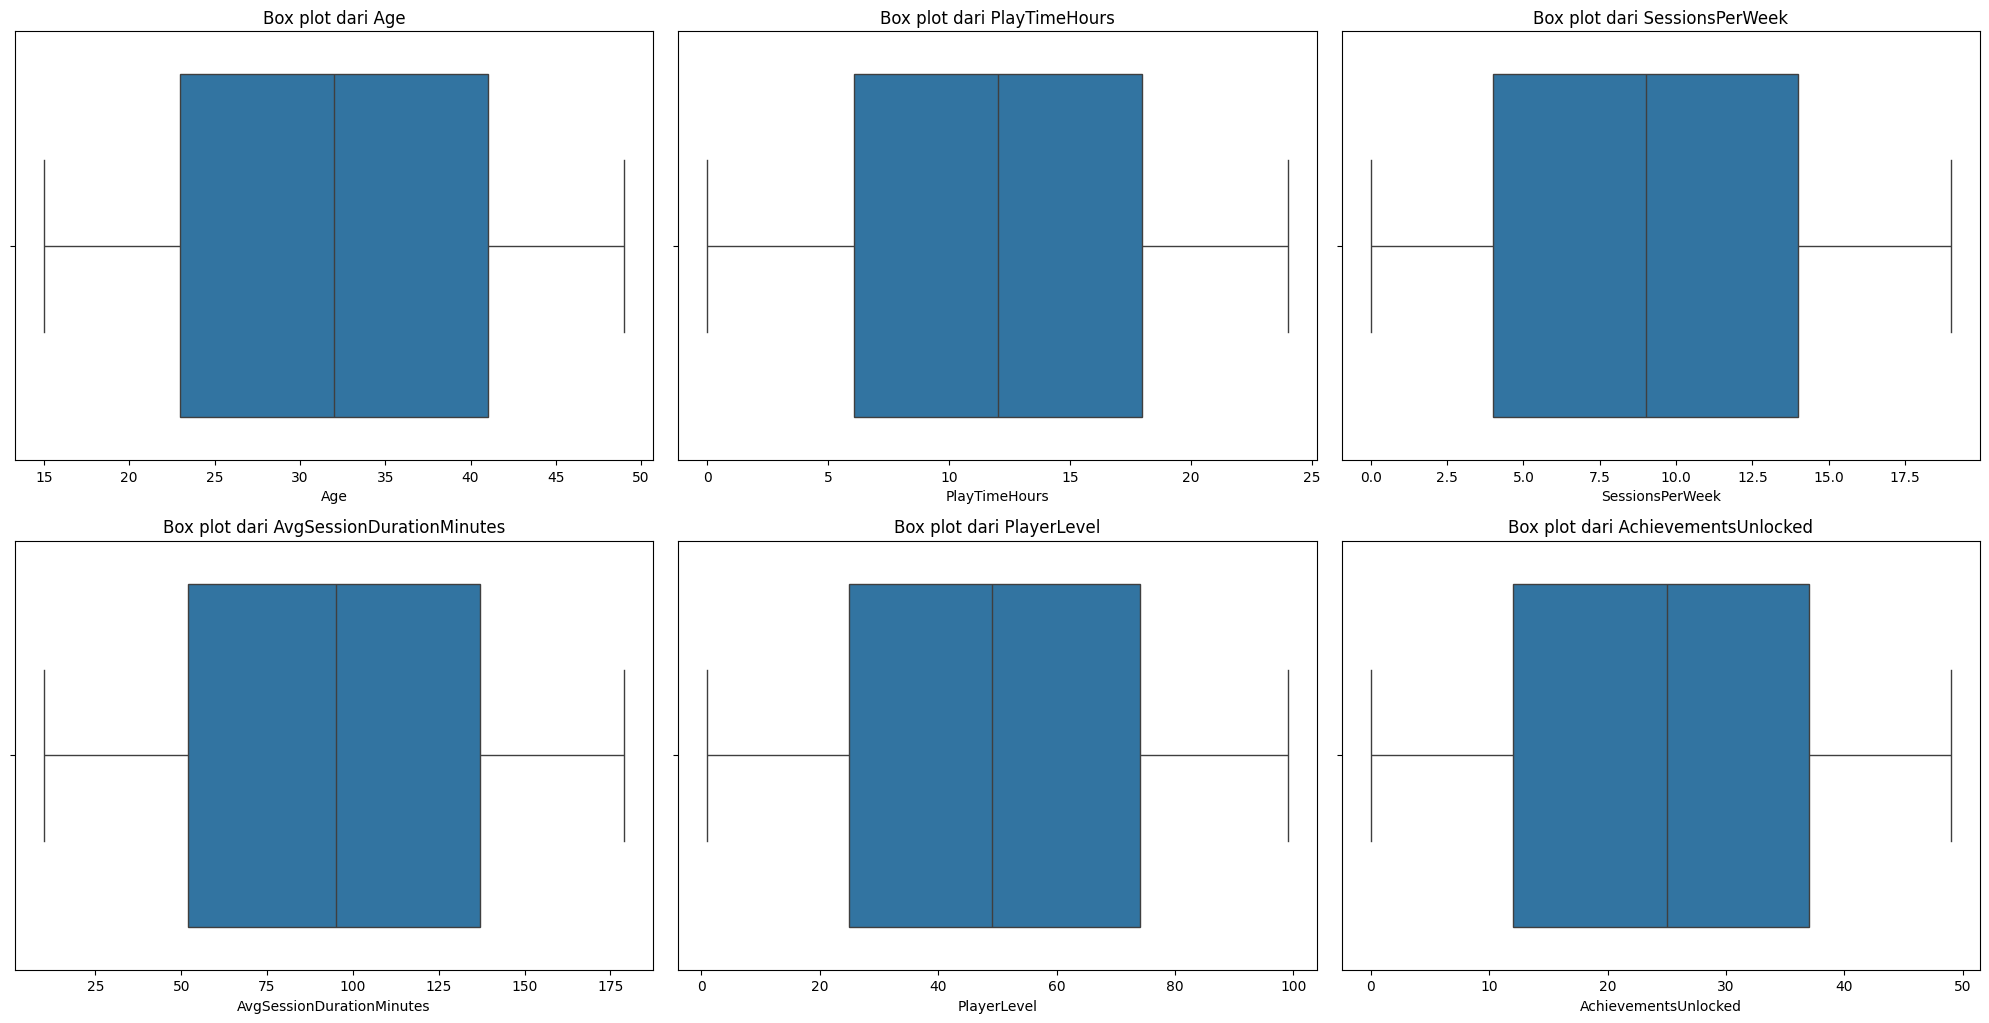

In [ ]:
numeric_columns = ['Age', 'PlayTimeHours', 'SessionsPerWeek',
                   'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'
                   ]

plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot dari {col}')

plt.tight_layout()
plt.savefig("Box plot.png", dpi=300)
plt.show()

Dataset juga bersih dari outliers

## EDA Univariate

selanjutnya melakukan EDA Univariate, hal ini dilakukan untuk memahami distribusi satu variabel secara mendalam.

In [ ]:
numerical_features = ['Age', 'PlayTimeHours', 'SessionsPerWeek',
                   'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

**EDA Univariate Categorical**

Mamahami distribusi variabel kategori

**Gender**

        jumlah sampel  persentase
Gender                           
Male            23959        59.8
Female          16075        40.2


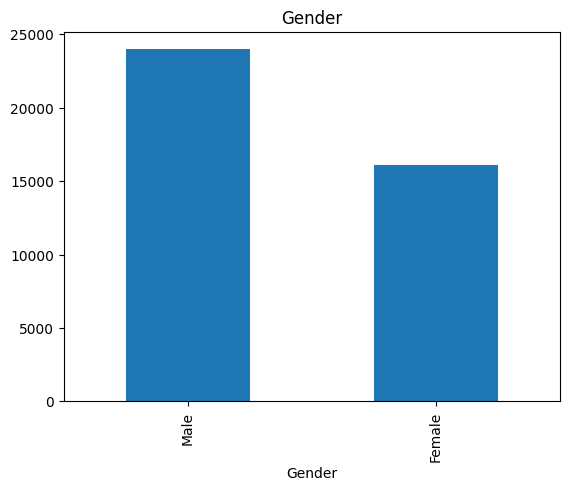

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
Gender = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(Gender)
count.plot(kind='bar', title=feature);

Untuk distribsi variabel gender tidak seimbang dengan didominasi oleh laki-laki dengan persentasi 59%.

**location**

          jumlah sampel  persentase
Location                           
USA               16000        40.0
Europe            12004        30.0
Asia               8095        20.2
Other              3935         9.8


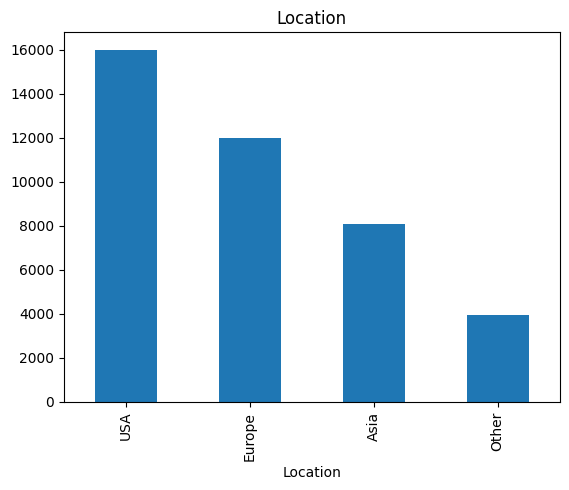

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
Location = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(Location)
count.plot(kind='bar', title=feature);

Pada distribusi location terdiri dari USA, Europe, Asia, dan lain-lain. Untuk kategori location juga terlihat tidak seimbang dengan didominasi oleh USA dengan persentasi 40%.

**GameGenre**

            jumlah sampel  persentase
GameGenre                            
Sports               8048        20.1
Action               8039        20.1
Strategy             8012        20.0
Simulation           7983        19.9
RPG                  7952        19.9


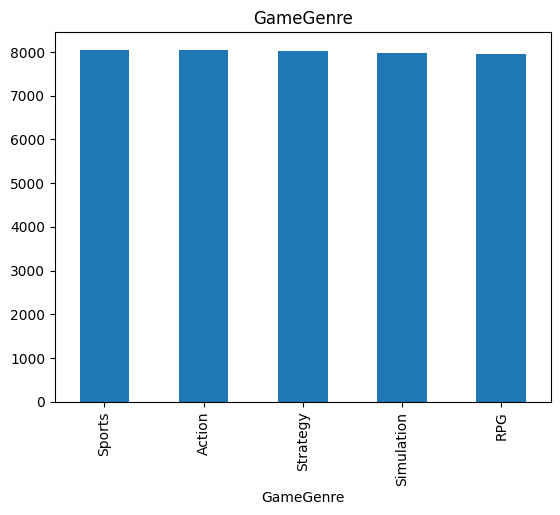

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
GameGenre = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(GameGenre)
count.plot(kind='bar', title=feature);

Untuk game genre memiliki distribusi yang seimbang.

**Game Difficulty**

                jumlah sampel  persentase
GameDifficulty                           
Easy                    20015        50.0
Medium                  12011        30.0
Hard                     8008        20.0


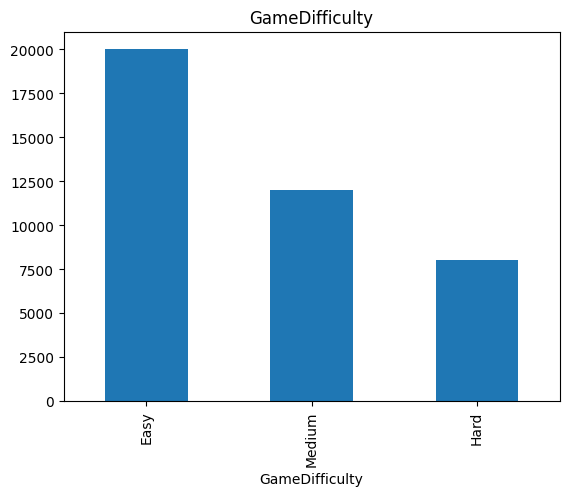

In [ ]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
GameDifficulty= pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(GameDifficulty)
count.plot(kind='bar', title=feature);

Pada fitur game difficulty disribusi data di dominasi oleh difficulty easy

**Engagement Level**

                 jumlah sampel  persentase
EngagementLevel                           
Medium                   19374        48.4
High                     10336        25.8
Low                      10324        25.8


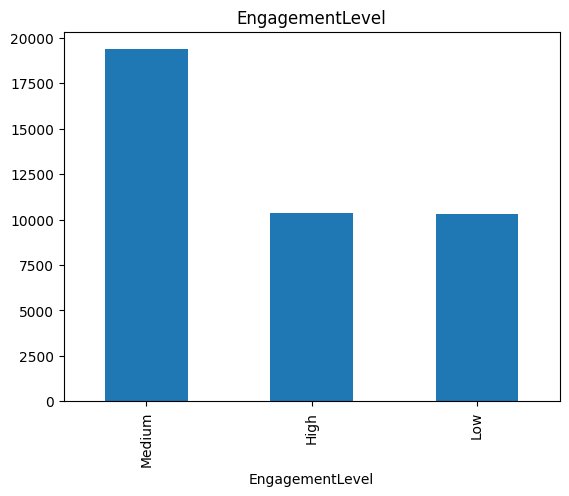

In [ ]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
GameDifficulty= pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(GameDifficulty)
count.plot(kind='bar', title=feature);

Pada Feature 'EngagementLevel' menjadi variabel target. Distribusi tidak seimbang karena di dominasi Medium dengan 48% sedangkan, high dan low hanya 25%

**Univariate Numerical**

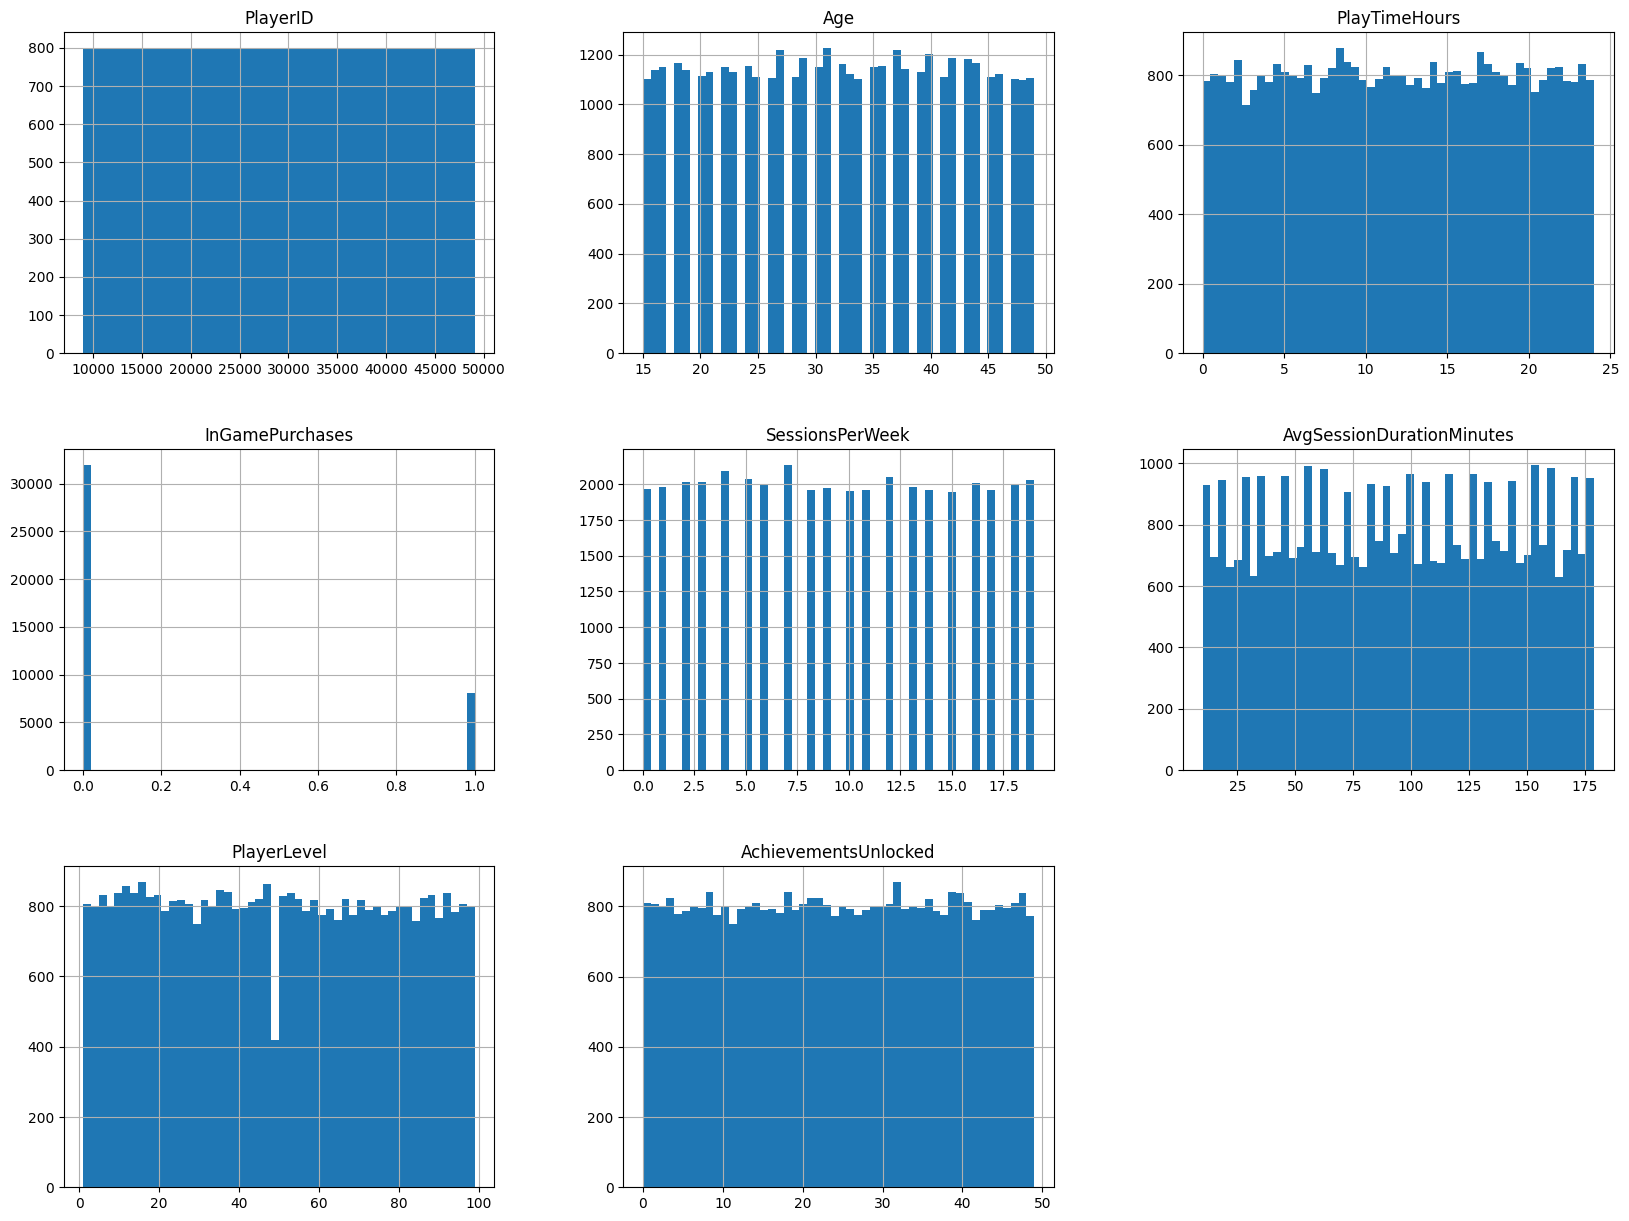

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("Univariate Numerical.png", dpi=300)
plt.show()

* Pada distribusi fitur numerik variabel 'Age', 'PlayTimeHours', 'SessionPerWeek', 'AchievementsUnlcoked' memiliki distribusi yang cukup seimbang.
* Untuk fitur 'InGamePurchases' didominasi oleh player yang tidak melakukan pembelian di dalam game
* Untuk kedua fitur 'AvgSessionDurationMinutes' dan 'PlayerLavel' terdapat perbedaan distribusi yang mencolok.

## EDA Multivariate

**Categorical Feature**

Melihat hubungan antara feature EngagementLevel dengan categorical feature yang lain

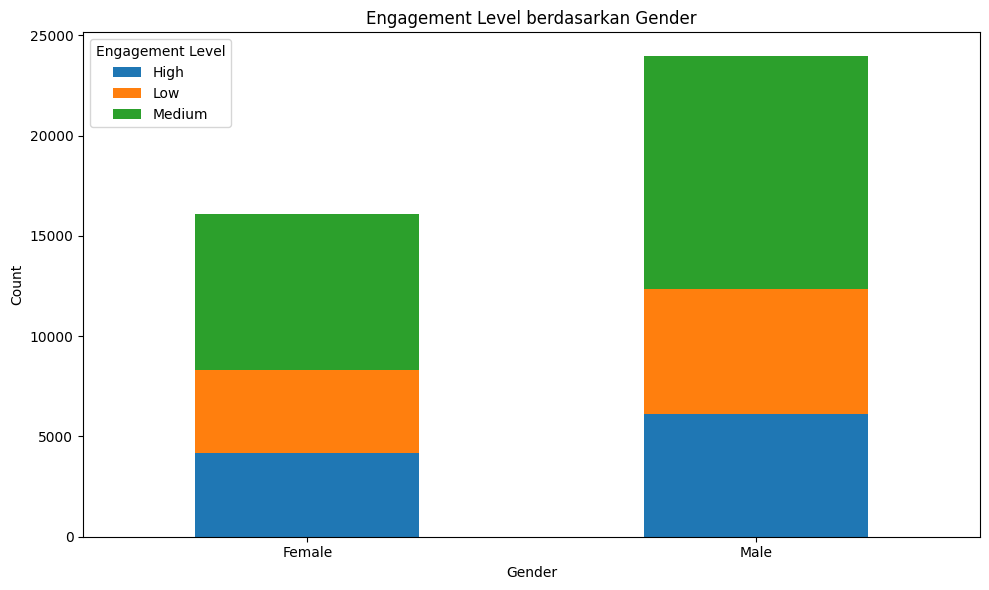

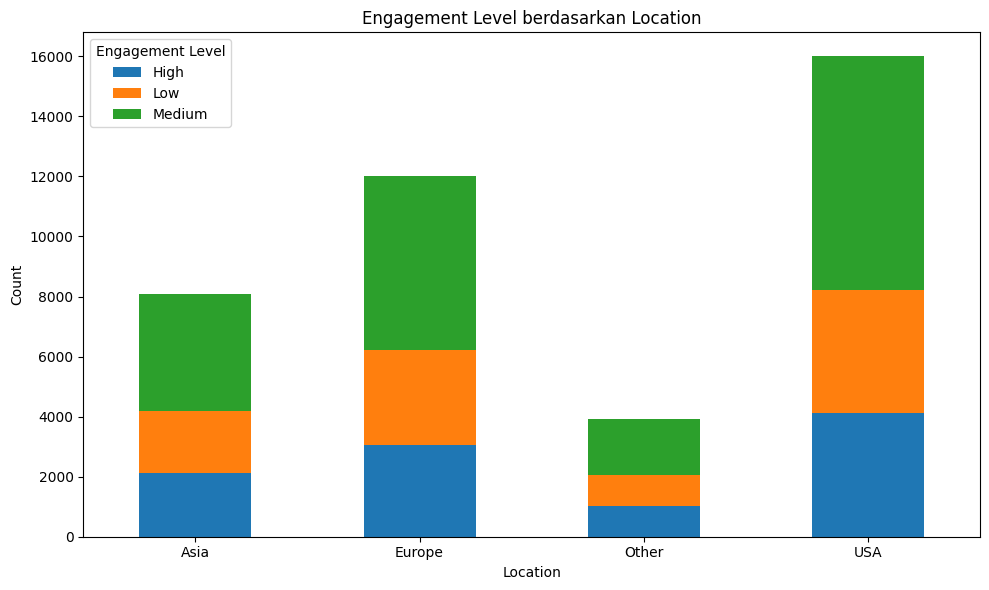

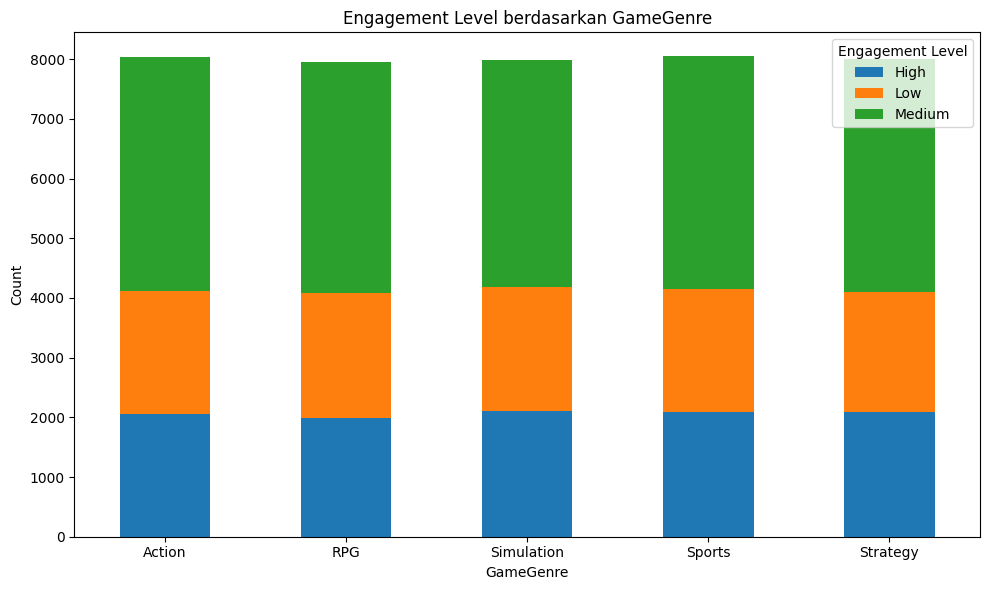

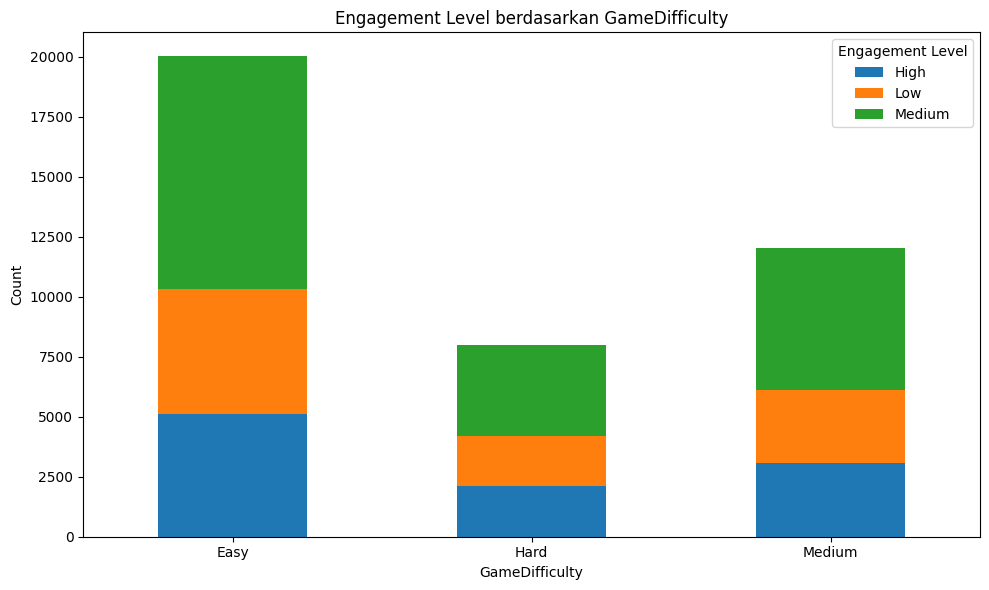

In [ ]:
cat_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for col in cat_features:
  crosstab = pd.crosstab(df[col], df['EngagementLevel'])
  crosstab.plot(kind='bar', stacked=True, figsize=(10,6))
  plt.title(f'Engagement Level berdasarkan {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.legend(title='Engagement Level')
  plt.tight_layout()
  plt.savefig(f'Engagement_Level_{col}.png', dpi=300)
  plt.show()

Dari EDA ada beberapa insight sebagai berikut:
* untuk semua fitur kategori memiliki kesamaan yaitu engagement level medium mendominasi/memiliki jumlah paling banyak diantara level yang lain.
* Untuk lebel high dan low juga memiliki kesamaan atau perbedaan yang tidak terlalu jauh pada fitur kategori

**Numerik Feature**

setelah melihat fitur kategori, selanjutnya melihat hubungan antara engagemnet level dengan numeric feature dengan menggunakan boxplot()

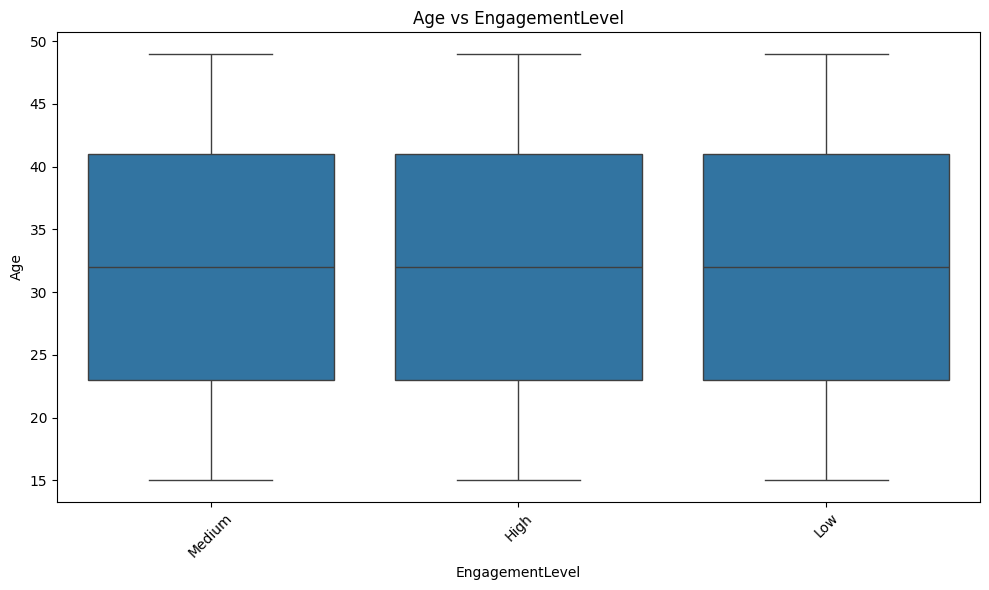

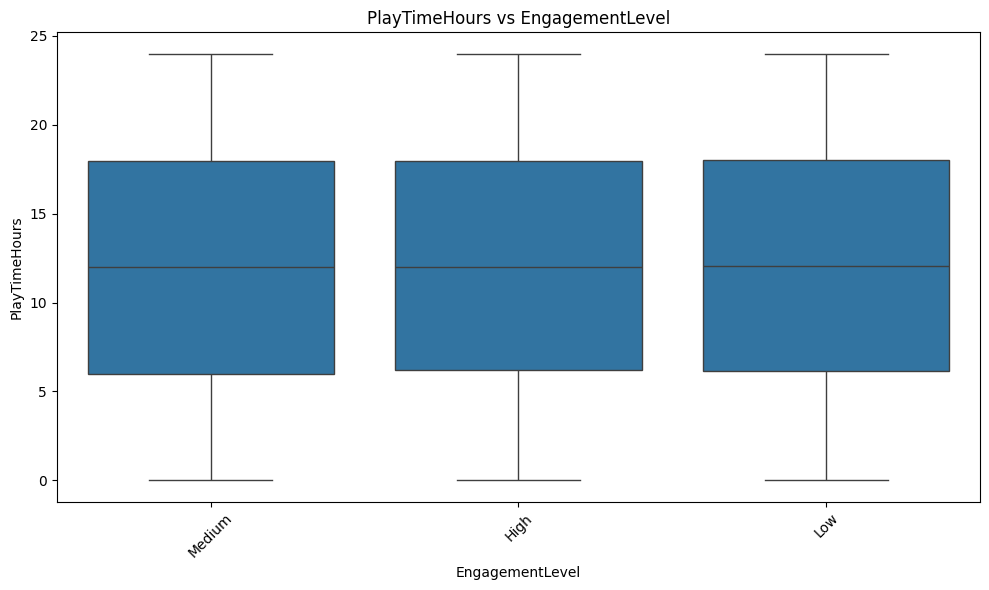

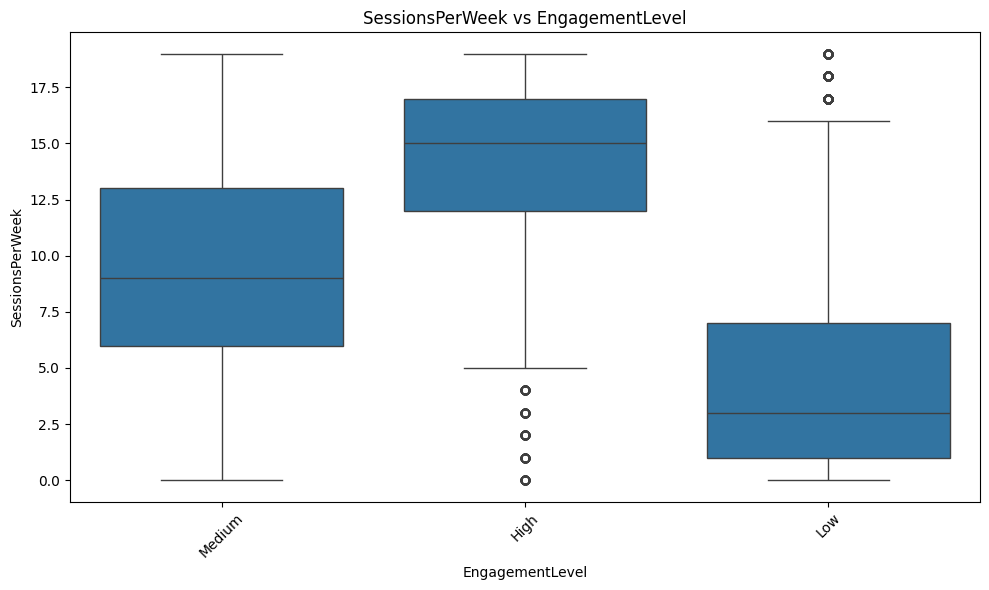

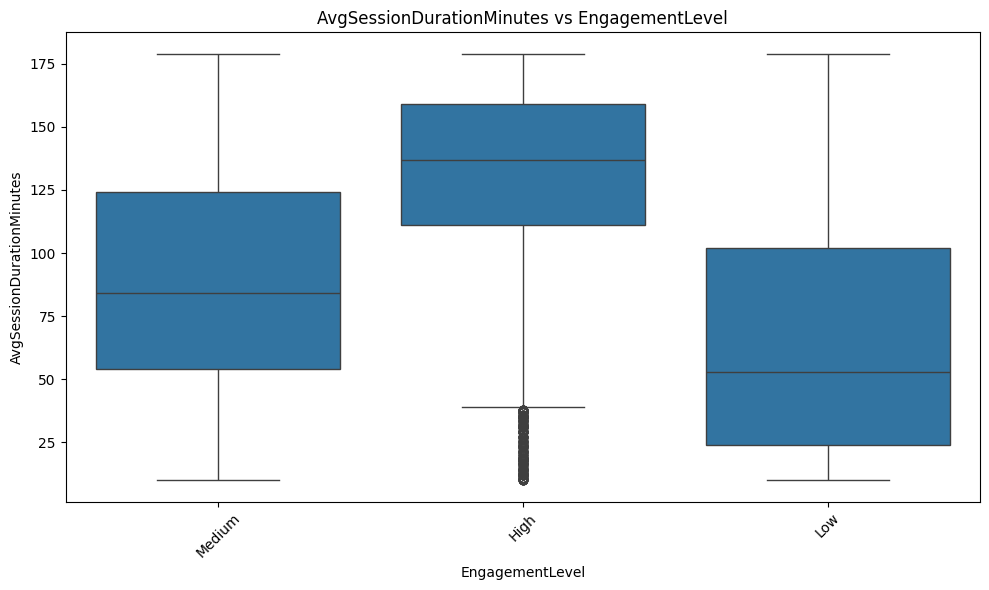

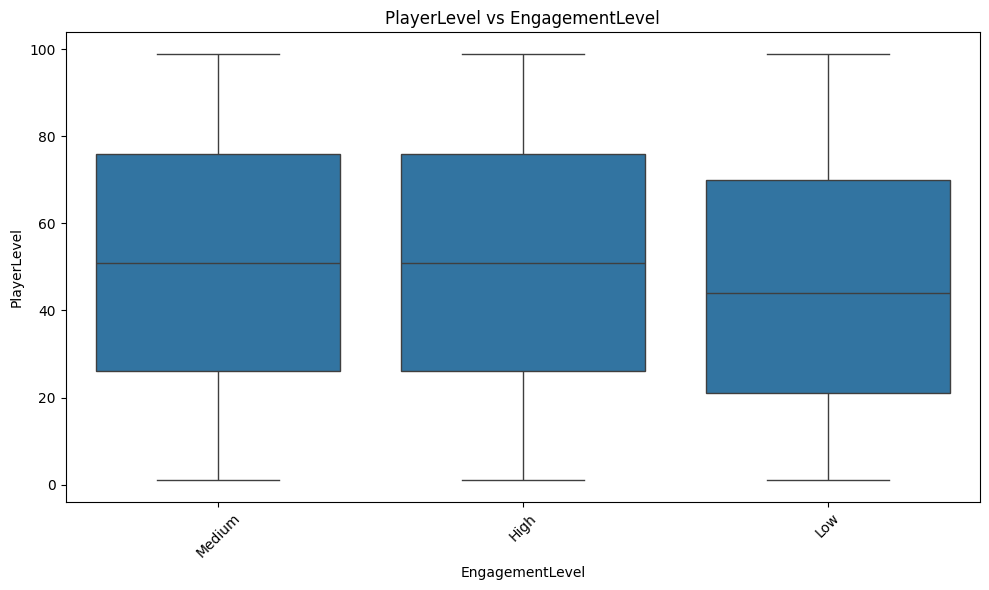

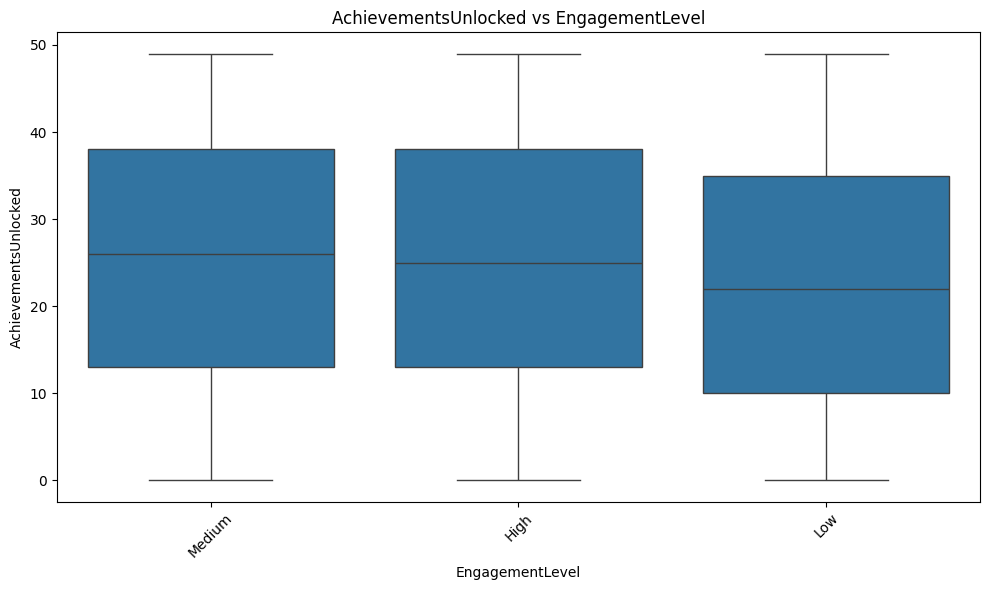

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['EngagementLevel'], y=df[col])
    plt.title(f'{col} vs EngagementLevel')
    plt.xlabel('EngagementLevel')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"Multivariate_Numerical_{col}.png", dpi=300)
    plt.show()

Dari EDA ada beberapa insight:
* Pada 'SessionPerWeek' terhadap 'EngagementLevel' memiliki perbedaan yang jelas. Player  dengan tingkat engagement yang tinggi cenderung memiliki sesi mingguan yang lebih banyak. Akan tetapi, pada engagement level rendah dan tinggi bervariasi dalam jumlah sesi per minggu, ada beberapa player yang memiliki sesi tinggi tetapi tingkat engagement mereka dianggap rendah dan begitu sebaliknya.
* Pada 'AvgSessionDurationMinutes' juga memiliki beberapa hal menarik seperti perbedaan yang jelas antara rata-rata durasi menit player dengan engagement mereka. Akan tetapi untuk tingkat tinggi memiliki outlier dimana beberapa pemain dengan durasi menit yang rendah memiliki tingkat engagement yang tinggi



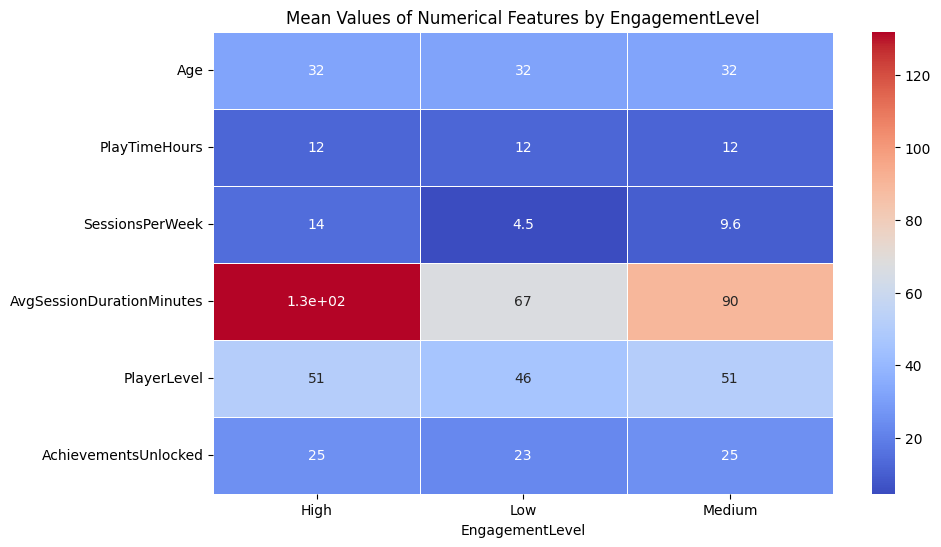

In [ ]:
mean_values = df.groupby('EngagementLevel')[numerical_features].mean(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(mean_values.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mean Values of Numerical Features by EngagementLevel')
plt.savefig("Multivariate Heatmap.png", dpi=300)
plt.show()

Nilai mean dari fitur numerik terhadap 'EngagementLevel' mendapatkan beberapa insight:
* Pada fitur 'SessionsPerWeek' player dengan sesi terbanyak dalam per minggu memiliki engagement level yang tinggi. sedangkan, untuk sesi sedikit memiliki engagement level yang rendah.
* Pada fitur'AvgsessionDurationMinutes' player dengan rata-rata durasi tertinggi mencapai 130 menit per sesi memiliki engagement yang tinggi, sedangkan untuk rata-rata durasi 67 menit per sesi memiliki engagement yang rendah.

# Data Preparation

Pada tahap ini untuk mempersiapkan dataset untuk melatih model machine learning. beberapa tahap yang akan dilakukan:
1. Seleksi fitur
2. Encoding fitur kategori
3. pembagian dataset
4. standarisasi




## Seleksi fitur

Tahap ini akan menseleksi fitur yang tidak berkaitan dengan fitur target 'EngagementLevel'.


In [ ]:
new_df = df.drop(['PlayerID'], axis=1, inplace=False)
new_df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


Mengehapus fitur 'PlayerID' karena 'PlayerID' hanya menjadi pengenal unik untuk setiap pemain. Jadi ini tidak ada hubungannya dengan 'EngagementLevel'.

## Encoding Fitur Kategori

Proses ini dilakukan untuk mengubah tipe objek pada kategori menjadi nilai numerik
menggunakan teknik one-hot-encoding.

In [ ]:
new_df = pd.concat([new_df, pd.get_dummies(new_df['Gender'], prefix='Gender')], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(new_df['Location'], prefix='Location')], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(new_df['GameGenre'], prefix='GameGenre')], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(new_df['GameDifficulty'], prefix='GameDifficulty')], axis=1)
new_df.drop(['Gender', 'Location', 'GameGenre', 'GameDifficulty'], axis=1, inplace=True)
new_df = new_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
new_df.head()

Tahap ini juga melakukan encoder pada fitur target yaitu 'EngagementLevel' dengan teknik Odrinal-Encoder yang akan melakukan tranformasi tipe objek menjadi tipe numerik yang memiliki tingkatan.

In [ ]:
label_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
new_df['EngagementLevel'] = label_encoder.fit_transform(new_df[['EngagementLevel']])

new_df.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,1.0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,29,5.525961,0,5,144,11,10,1.0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,22,8.223755,0,16,142,35,41,2.0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,35,5.265351,1,9,85,57,47,1.0,0,1,...,0,1,1,0,0,0,0,1,0,0
4,33,15.531945,0,2,131,95,37,1.0,0,1,...,0,0,1,0,0,0,0,0,0,1


Fitur 'EngagementLevel' sudah dirubah menjadi tipe numerik. berikut ini merupakan deskripsinya:
* 0 : 'Low'
* 1 : 'Medium'
* 3 : 'High'

## Pembagian dataset

pada tahap ini kita akan melakukan pembagian dataset menjadi dataset latih dan dataset test dengan menggunakan fungsi train_test_split. Pembagian dataset yang kita lakukan adalah 90:10 karena dataset yang kita miliki 40000 data.

In [ ]:
X = new_df.drop(['EngagementLevel'], axis=1)
y = new_df['EngagementLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'Jumlah dataset: {len(new_df)}')
print(f'Jumlah dataset train: {len(X_train)}')
print(f'Jumlah dataset test: {len(X_test)}')

Jumlah dataset: 40034
Jumlah dataset train: 36030
Jumlah dataset test: 4004


## Standarisasi

Pada langkah ini menerapkan standarisasi dengan StandardScaler(). Tahapan ini merupakan tahapan umum yang dilakukan untuk mempersiapkan dataset agar machien learning memiliki peforma lebih baik dan konvergen lebih cepat.

Dengan StandardScaler() sebagai teknik transformasi paling umum dilakukan. StandarScaler melakukan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar debiasi untuk menggeser distribusi. ini akan menghasilkan standar deviasi 1 dan mean 0


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modaling

Pada tahap modeling akan dilakukan dengan algoritma machine learning untuk klasifikasi kategori. Beberapa algortima yang akan saya gunakan adalah:
1. Random Forest Classifier, ini karena Random Forest cocok untuk dataset yang besar dengan banyak fitur.
2. Logistic Regression, Algoritma yang cepat dan cocok untuk masalah klasifikasi multiclass denga fitur terstruktur.
3. Gradient Boosting Machines, Ini adalah algortima boosting yang cenderung memiliki hasil yang sangat baik untuk tugas klasifikasi, dan efisien untuk dataset besar.



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=400, max_depth=20, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=400, n_jobs=-1,
                       random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300, random_state=42)
lr_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=300, multi_class='multinomial', random_state=42)

## XGBoost

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=250,
                                   max_depth=24, n_jobs=-1, random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=-1, num_class=3,
              num_parallel_tree=None, ...)

# Evaluasi
Pada tahap ini dilakukan evaluasi pada setiap model yang telah dilatih. Untuk metrik yang digunakan adalah akurasi dan classification_report. Classificasion_report berfungsi untuk melihat performa model dalam klasifikasi dengan model precision, recall, dan f1 score

## Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88      1041
         1.0       0.89      0.94      0.92      1960
         2.0       0.91      0.85      0.88      1003

    accuracy                           0.90      4004
   macro avg       0.90      0.88      0.89      4004
weighted avg       0.90      0.90      0.90      4004



Secara keseluruhan, model Random Forest menunjukkan performa yang baik pada dataset ini dengan akurasi tinggi 90%. Setiap kelas memiliki precision, recall, dan f1-score yang cukup tinggi, meskipun kelas 'Low' sedikit lebih baik dalam recall dan f1-score dibandingkan kelas lainnya.

## Logistic Regression

In [ ]:
y_pred = lr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75      1041
         1.0       0.80      0.89      0.84      1960
         2.0       0.89      0.82      0.86      1003

    accuracy                           0.82      4004
   macro avg       0.83      0.80      0.81      4004
weighted avg       0.82      0.82      0.82      4004



Model Logistic Regression menunjukkan performa yang baik dengan akurasi 82%. Precision dan recall untuk kelas 'Medium' dan 'High' lebih tinggi dibandingkan kelas 'Low', menunjukkan bahwa model lebih baik dalam mendeteksi sampel kelas 'Medium' dan 'High'.

## XGBoost

In [ ]:
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

Accuracy: 0.9115884115884116
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1041
         1.0       0.92      0.94      0.93      1960
         2.0       0.91      0.89      0.90      1003

    accuracy                           0.91      4004
   macro avg       0.91      0.90      0.91      4004
weighted avg       0.91      0.91      0.91      4004



Model XGBoost menunjukkan performa yang sangat baik dengan akurasi tinggi 91.2% dan nilai precision, recall, serta f1-score yang stabil di semua kelas. Kelas 'Medium' memiliki performa terbaik dengan recall dan f1-score yang tertinggi, menunjukkan bahwa model sangat baik dalam mendeteksi sampel kelas ini.

# Kesimpulan

XGBoost memiliki performa yang lebih baik dibandingkan Logistic Regression dan sedikit lebih baik dibandingkan Random Forest pada data ini. Hal ini menandakan bahwa XGBoost adalah pilihan yang kuat untuk dataset ini, terutama karena kemampuannya menjaga performa yang konsisten di seluruh kelas.